# Dense Embedding Times


In [1]:
#ONLY RUN THIS BLOCK ONCE!

import os
import sys
from pathlib import Path
from importlib import reload

PROJECT_ROOT = Path.cwd().parent.parent  # points to nl-pe/
SRC_PATH = PROJECT_ROOT / "src"
sys.path.insert(0, str(SRC_PATH))  # make nl_pe importable
os.chdir(PROJECT_ROOT)  

In [2]:
from pathlib import Path
import json
import matplotlib.pyplot as plt

def plot_embedding_times(method_paths, method_names, bar_styles=None, title="Embedding Time per Method"):
    embedding_times = []
    valid_methods = []

    print("Loading embedding times...")

    for i, path in enumerate(method_paths):
        path = Path(path)  # convert to Path object
        file_path = path / "detailed_results.json"
        if not file_path.exists():
            print(f"Warning: {file_path} does not exist. Skipping.")
            continue

        with open(file_path, "r") as f:
            data = json.load(f)
            embedding_time = data.get("embedding_time")
            if embedding_time is None:
                print(f"Warning: 'embedding_time' not found in {file_path}. Skipping.")
                continue
            embedding_times.append(embedding_time)
            valid_methods.append(method_names[i])

    if not embedding_times:
        print("No embedding times found. Exiting.")
        return

    # Set up bar styles
    if bar_styles is None:
        bar_styles = [{}] * len(embedding_times)
    elif len(bar_styles) < len(embedding_times):
        bar_styles += [bar_styles[-1]] * (len(embedding_times) - len(bar_styles))

    # Plot
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(valid_methods, embedding_times)

    # Apply styles
    for bar, style in zip(bars, bar_styles):
        if "color" in style:
            bar.set_color(style["color"])
        if "hatch" in style:
            bar.set_hatch(style["hatch"])

    ax.set_ylabel("Embedding Time (s)")
    ax.set_title(title)
    ax.grid(axis="y")
    plt.tight_layout()
    plt.show()


Loading embedding times...


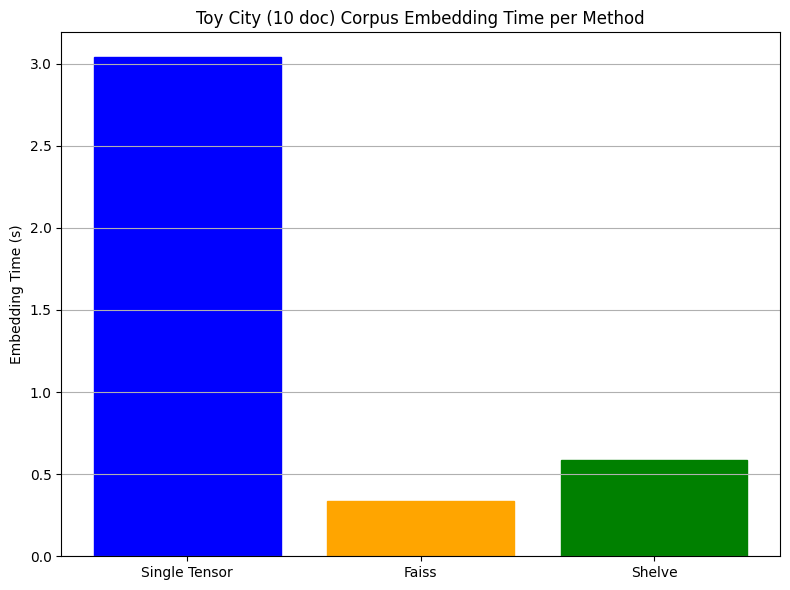

In [4]:
# Example usage
method_paths = [
    'data/ir/toy_cities/qwen_600M/no_prompts/single_tensor',
    'data/ir/toy_cities/qwen_600M/no_prompts/faiss',
    'data/ir/toy_cities/qwen_600M/no_prompts/shelve',
]

method_names = [
    'Single Tensor',
    'Faiss',
    'Shelve',
]

bar_styles = [
    {'color': 'blue'},
    {'color': 'orange'},
    {'color': 'green'},
]

plot_embedding_times(method_paths, method_names, bar_styles=bar_styles,
                     title="Toy City (10 doc) Corpus Embedding Time per Method")